In [53]:
# imports

import os
import sys
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal
from sklearn import preprocessing
from sklearn import mixture

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
HEPART_data = pd.read_csv("/home/seamus/GitHub/aitiaexplorer/src/aitia_explorer/target_data/data/HEPARTWO100.csv")
HEPART_data

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,absent,absent,absent,absent,absent,absent,present,present,absent,absent,...,absent,present,a49_30,absent,present,absent,absent,present,absent,absent
1,absent,absent,absent,absent,absent,present,present,present,absent,absent,...,present,present,a70_50,present,absent,absent,absent,absent,absent,absent
2,absent,absent,absent,absent,absent,present,absent,absent,present,absent,...,present,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
3,absent,absent,absent,absent,absent,absent,absent,absent,absent,absent,...,present,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
4,absent,present,absent,absent,absent,absent,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,absent,absent,absent,absent,present,absent,absent,absent,absent,absent,...,absent,absent,a29_0,absent,absent,absent,absent,absent,absent,absent
96,absent,absent,absent,absent,present,absent,present,present,present,absent,...,present,present,a70_50,present,absent,absent,absent,absent,absent,absent
97,absent,present,absent,absent,absent,absent,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent
98,absent,absent,absent,absent,absent,present,absent,absent,absent,absent,...,absent,absent,a70_50,absent,absent,absent,absent,absent,absent,absent


In [3]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

df = HEPART_data.apply(le.fit_transform)
df

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,0,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,0
1,0,0,0,0,0,1,1,1,0,0,...,1,1,2,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,1,0,1,1,1,0,...,1,1,2,1,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
98,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.50)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data = principal_components)

In [37]:
pca.explained_variance_ratio_

array([0.05864818, 0.05511842, 0.04693587, 0.04411734, 0.040113  ,
       0.03753628, 0.03607488, 0.03447354, 0.03319286, 0.03178497,
       0.03115488, 0.02836527, 0.02768028])

In [38]:
len(pca.explained_variance_ratio_)

13

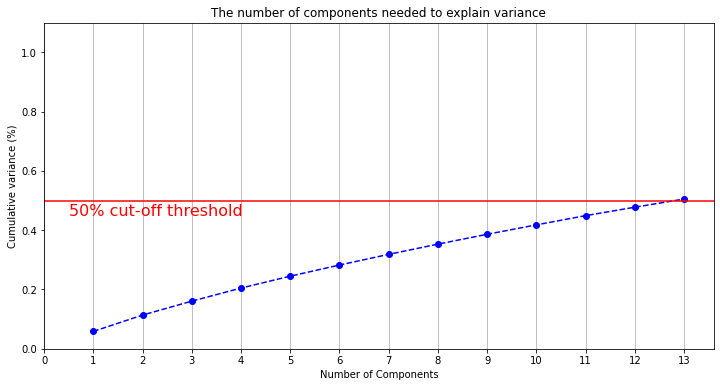

In [40]:
%matplotlib inline
n_comps = len(pca.explained_variance_ratio_)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, n_comps+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n_comps+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.50, color='r', linestyle='-')
plt.text(0.5, 0.45, '50% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

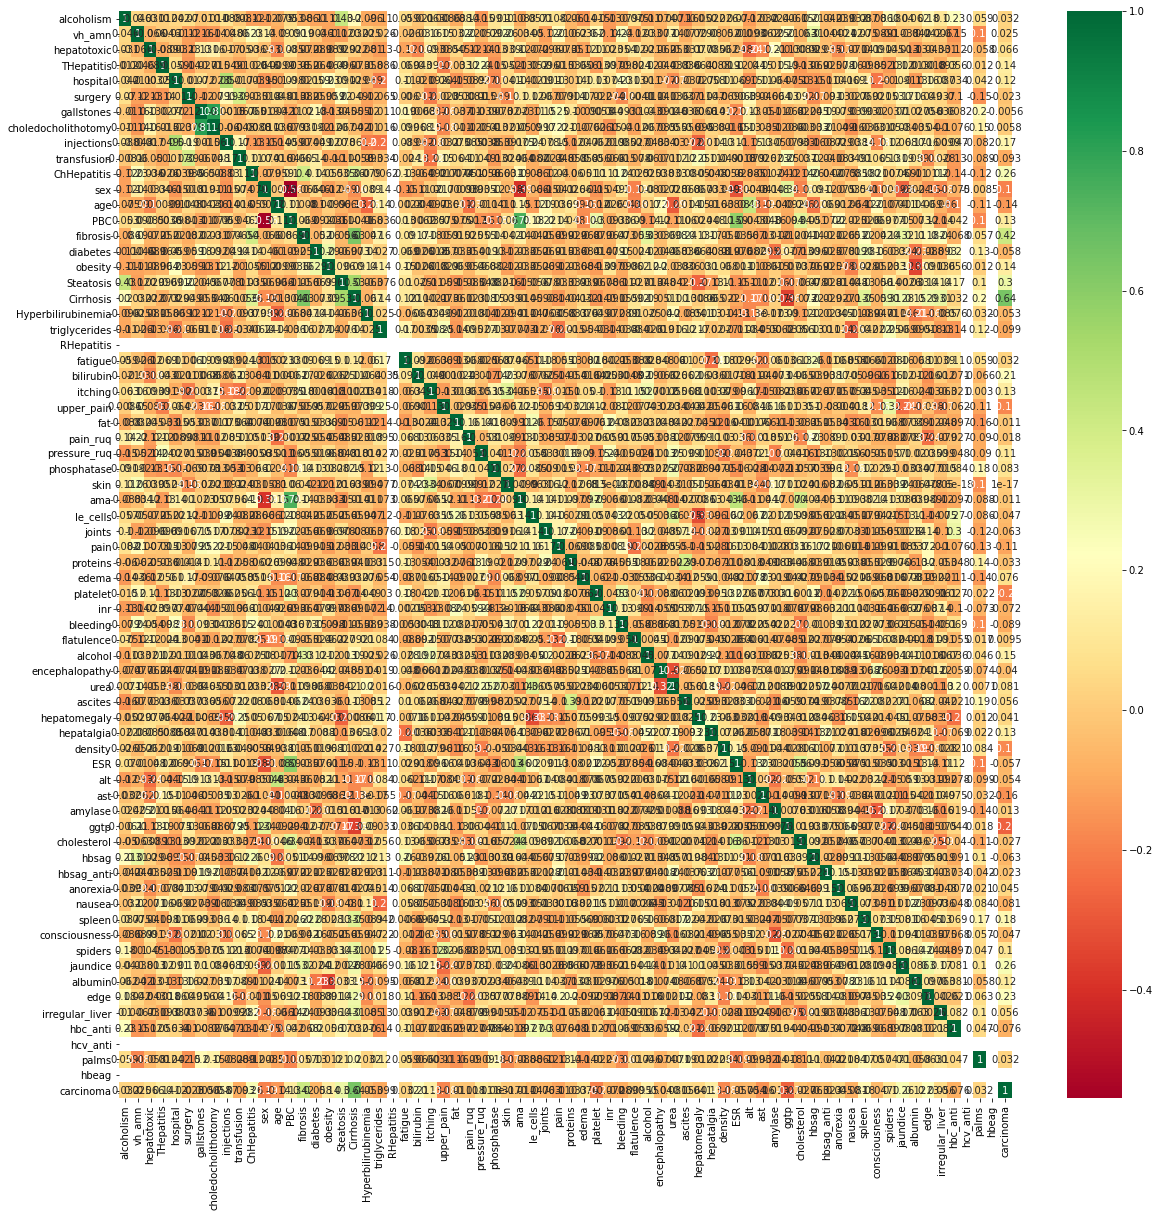

In [51]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [135]:
# using unsupervised randomforest
# http://gradientdescending.com/unsupervised-random-forest-example/
# https://horvath.genetics.ucla.edu/html/RFclustering/RFclustering/RandomForestHorvath.pdf
# https://stats.stackexchange.com/questions/72370/how-to-perform-unsupervised-random-forest-classification-using-breimans-code

def get_clustered_dataframe(incoming_df, column_list, sample_size):
    gmm = mixture.BayesianGaussianMixture(n_components=2, 
                                          covariance_type="full", 
                                          n_init=100, 
                                          random_state=42).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

df_bgmm = get_clustered_dataframe(df, list(df), 100)

In [136]:
df_bgmm['original_data'] = 0
df_bgmm

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma,synthetic,original_data
0,-0.048685,0.083400,0.090677,0.052012,0.720611,0.271998,0.284826,0.114674,0.773481,0.154672,...,1.321109,0.116039,0.331341,-0.183022,-0.000422,0.415620,-0.000236,-0.110811,0.001006,0
1,0.174365,0.142450,0.117027,0.014589,-0.396693,0.156215,0.277642,0.268759,-0.455730,0.232886,...,1.962660,0.118441,0.240453,0.445658,0.000149,0.280528,-0.000855,0.089669,-0.001051,0
2,-0.218326,0.161781,-0.023971,0.127327,0.765392,0.512718,-0.019894,0.128407,0.707037,0.072312,...,1.792509,0.440785,0.385996,0.043770,0.000742,-0.196936,-0.000624,0.086873,0.000426,0
3,0.222537,0.014863,0.086076,-0.056608,0.254359,0.509420,0.605423,0.456277,-0.106653,0.182079,...,1.352491,-0.426305,0.122442,-0.267231,0.001037,-0.065784,0.000809,-0.175707,0.001395,0
4,0.301076,0.053381,0.059466,0.066662,0.577003,0.871496,0.188383,0.052542,0.785601,0.304627,...,1.861914,0.463796,0.007690,-0.041522,-0.000105,-0.029904,0.000012,0.113265,-0.000655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.098484,0.203996,-0.172064,0.158294,0.105580,0.312833,-0.177436,-0.007133,0.050244,-0.041205,...,1.158126,0.167314,-0.135578,-0.182099,-0.000113,0.224274,-0.001240,-0.053467,-0.000935,0
96,-0.416558,0.688260,0.097199,0.172213,0.208609,0.296195,-0.133351,0.128202,0.086466,-0.342440,...,1.306920,-0.287273,-0.221404,-0.213120,0.000932,-0.359116,0.001140,0.124580,-0.000400,0
97,0.098554,0.937973,0.295636,-0.345699,0.203873,0.802675,-0.267832,-0.137505,0.324223,0.080821,...,1.492610,0.372380,0.069999,-0.155105,-0.001140,-0.208615,0.001683,-0.069864,0.000061,0
98,-0.163116,0.182989,-0.174498,0.082230,0.699668,0.541991,0.197190,0.014725,0.564406,0.193454,...,1.929816,0.294766,0.460588,-0.076589,0.000730,0.111084,0.000204,0.054161,-0.000861,0


In [137]:
df['original_data'] = 1
df

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma,synthetic,original_data
0,0,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,1,1,1,0,0,...,2,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96,0,0,0,0,1,0,1,1,1,0,...,2,1,0,0,0,0,0,0,0,1
97,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1


In [138]:
df_combined = df.append(df_bgmm, ignore_index=True)

In [142]:
# shuffle the data
df_combined = df_combined.sample(frac=1)
df_combined

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma,synthetic,original_data
36,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
91,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
84,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
102,-0.218326,0.161781,-0.023971,0.127327,0.765392,0.512718,-0.019894,0.128407,0.707037,0.072312,...,1.792509,0.440785,0.385996,0.043770,0.000742,-0.196936,-0.000624,0.086873,0.000426,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
145,-0.085023,0.091054,0.455240,0.027226,0.725513,0.575867,0.495004,0.498682,0.984958,-0.083628,...,1.601405,0.824509,-0.252525,0.338114,0.000435,0.294167,-0.001269,0.162568,-0.000574,0
40,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
148,0.340918,-0.070430,0.426680,0.069454,0.781686,0.710485,0.589620,0.556706,0.842263,-0.148231,...,2.221269,0.704203,-0.076941,0.074990,-0.001377,0.117806,-0.000754,0.409533,0.000906,0


In [143]:
X = df_combined.drop(['original_data'], axis=1).values
X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.40917996e-01, -7.04303322e-02,  4.26680001e-01, ...,
        -7.54186413e-04,  4.09532500e-01,  9.06358037e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [144]:
y = df_combined['original_data'].values

In [145]:
y = y.ravel()
y

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1])

In [146]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
from sklearn.model_selection import train_test_split

# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [147]:
feat_labels = list(df)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('alcoholism', 0.018028905492276145)
('vh_amn', 0.009999191491148708)
('hepatotoxic', 0.020073274900655122)
('THepatitis', 0.03621859486674451)
('hospital', 0.008416557219313439)
('surgery', 0.006213392329425153)
('gallstones', 0.017272662836243367)
('choledocholithotomy', 0.012906028852152323)
('injections', 0.004877353471293054)
('transfusion', 0.00846766878385673)
('ChHepatitis', 0.00916978454243297)
('sex', 0.0033963664464735145)
('age', 0.0010943761663865707)
('PBC', 0.006712083046925916)
('fibrosis', 0.03839828101022499)
('diabetes', 0.01697932089376788)
('obesity', 0.028974852835161446)
('Steatosis', 0.024677066504821318)
('Cirrhosis', 0.01793451506159346)
('Hyperbilirubinemia', 0.011204621756873707)
('triglycerides', 0.0036636612916106505)
('RHepatitis', 0.046204598022315566)
('fatigue', 0.0036148651329035364)
('bilirubin', 0.0019040513429285585)
('itching', 0.007283998507784485)
('upper_pain', 0.004259939112010501)
('fat', 0.02838587624615408)
('pain_ruq', 0.004891147357729912

In [183]:
feature_dict = {}
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    feature_dict[feature[0]] = feature[1]
features_sorted = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1])}
features_sorted = list(features_sorted.keys())
features_sorted.reverse()

In [185]:
features_sorted[:10]

['encephalopathy',
 'RHepatitis',
 'fibrosis',
 'bleeding',
 'THepatitis',
 'amylase',
 'consciousness',
 'obesity',
 'fat',
 'hepatomegaly']

-------------------------------------------------------------------------------------------

In [196]:
df_reduced = df[features_sorted[:20]]
df_reduced

,encephalopathy,RHepatitis,fibrosis,bleeding,THepatitis,amylase,consciousness,obesity,fat,hepatomegaly,synthetic,proteins,hbeag,Steatosis,inr,hbsag_anti,hcv_anti,carcinoma,joints,hepatotoxic
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
96,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [187]:
%run CommonCodeForExperiments.ipynb

In [188]:
aitia = App()

In [189]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [190]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)

In [191]:
pc = pycausal()
pc.start_vm()

In [ ]:
analysis_results, summary = run_causal_discovery(df_reduced, None, algorithm_list, pc)
summary

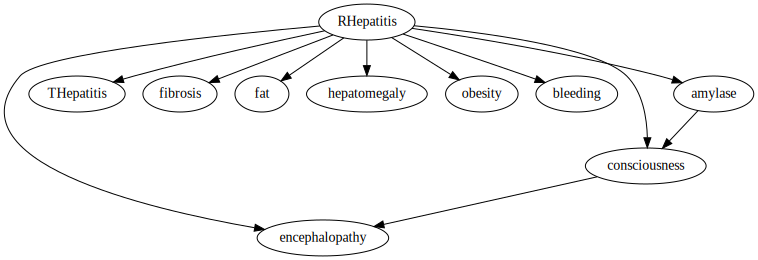

In [194]:
analysis_results[0]['causal_graph'].draw()

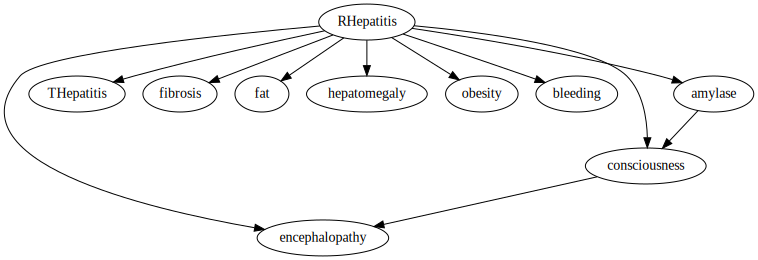

In [195]:
analysis_results[1]['causal_graph'].draw()